In [1]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
os.chdir(directory_path)
# Only for final delivery
import warnings
warnings.filterwarnings('ignore')
# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")
# Libraries models
import pandas as pd
import numpy as np
from collections import Counter
from time import time
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")
# Import the necessary module's
from scipy.stats import chi2
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# library to save the models
import joblib
# import home made function
from utils import get_na, plot_pie,traine, test

In [2]:
path = os.getcwd() + '/data/interim/model_data_train_ohe_oversample.csv' 
X_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/model_data_test_ohe.csv' 
X_test = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_train_ohe_oversample.csv' 
y_train = pd.read_csv(path, sep=',')
path = os.getcwd() + '/data/interim/y_test_ohe.csv' 
y_test = pd.read_csv(path, sep=',')['atraso_15']

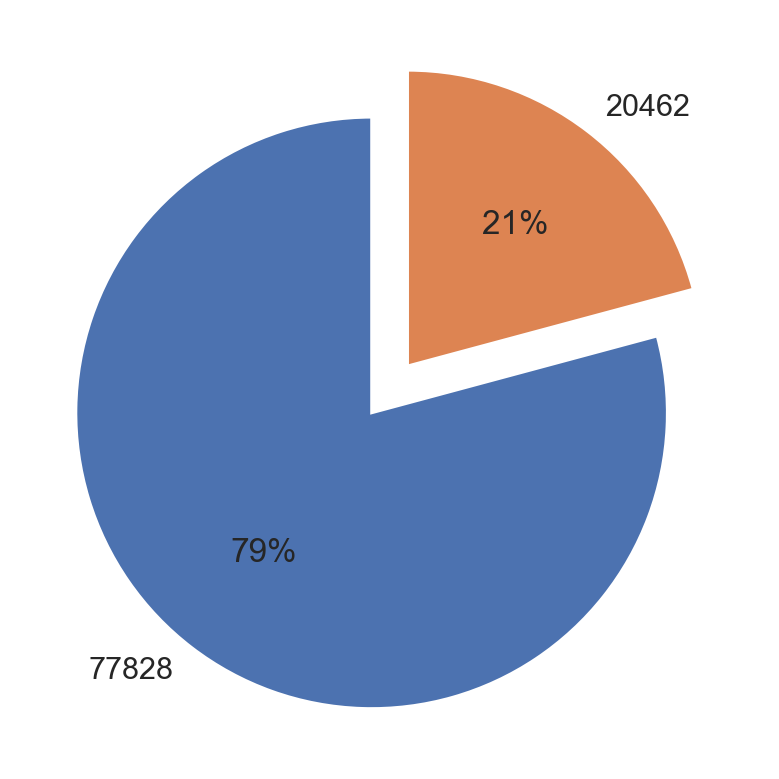

In [3]:
#define data
data = [X_train.shape[0],X_test.shape[0] ]
labels = [data[0], data[1]]
#create pie chart
plt.pie(data, labels = labels,startangle=90, 
        autopct='%1.f%%',explode=(0.1,0.1))
plt.show()

Información del dataset:
 las clases del target son: Counter({0: 38914, 1: 38914})


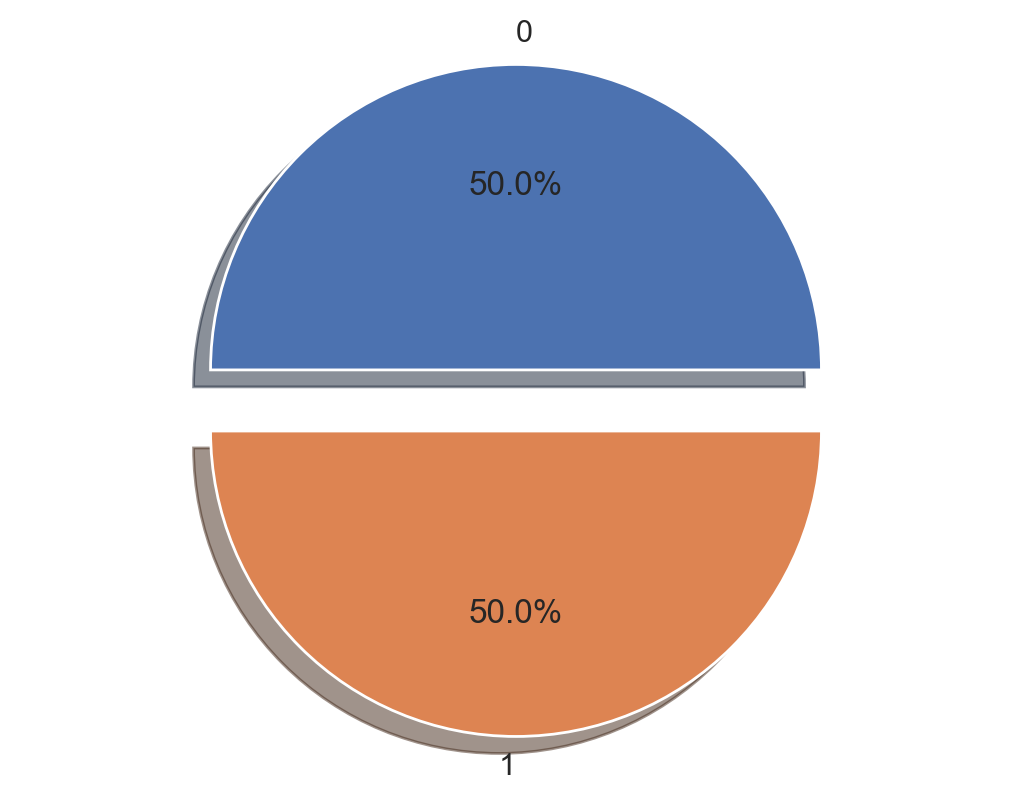

In [4]:
print('Información del dataset:'
      '\n las clases del target son: {}'.format(Counter(y_train.atraso_15)))
plot_pie(y_train.atraso_15)

In [5]:
clf = ComplementNB(alpha=0.1,class_prior = [0.815,0.185] )
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.6137003823592175
EL ROC AUC Score es: 0.6692470182643667
              precision    recall  f1-score   support

           0       0.87      0.65      0.74     16678
           1       0.27      0.58      0.37      3784

    accuracy                           0.64     20462
   macro avg       0.57      0.62      0.56     20462
weighted avg       0.76      0.64      0.68     20462



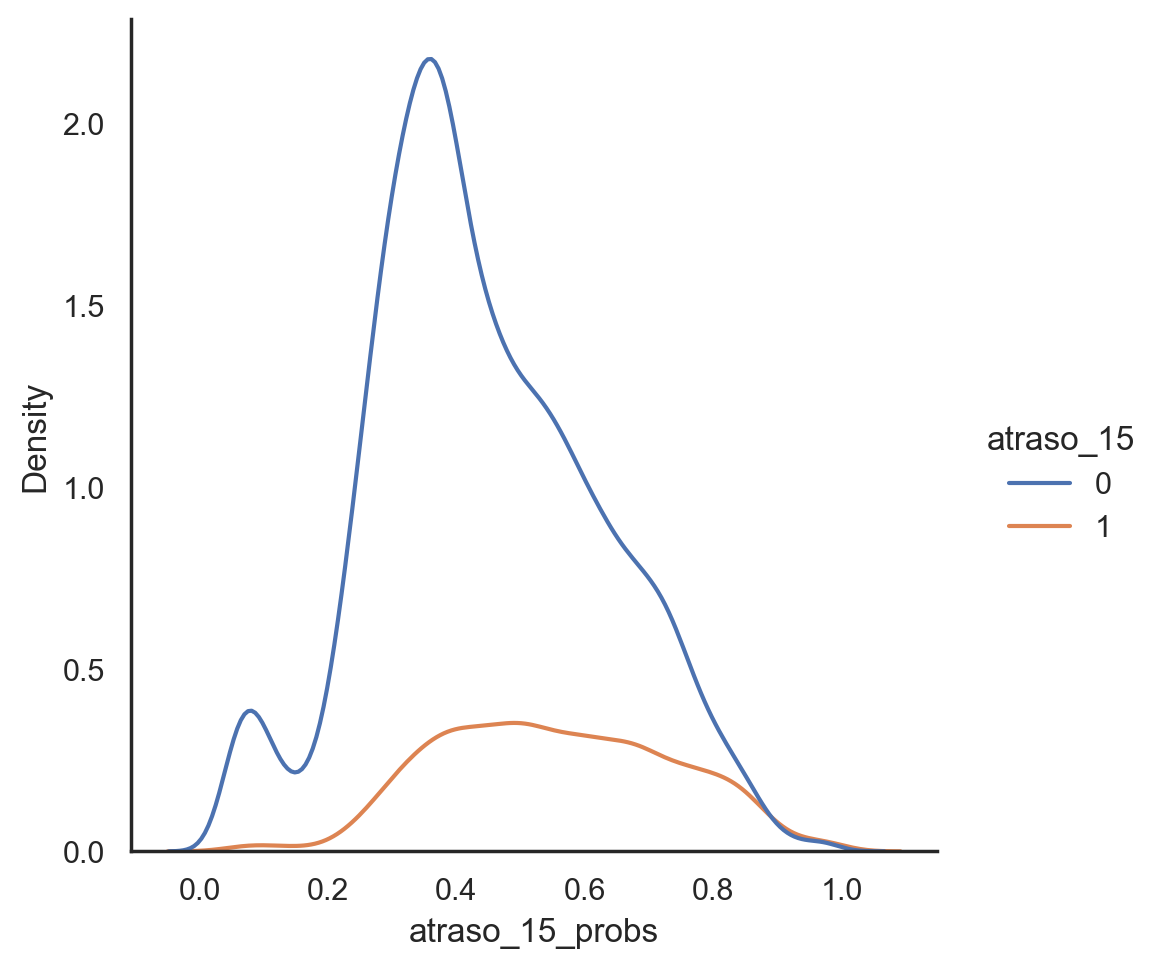

In [6]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [7]:
clf = DecisionTreeClassifier(random_state=0, max_features='sqrt',criterion='gini',
                             min_samples_split=0.001)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.6826437167470017
EL ROC AUC Score es: 0.6598221375426654
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     16678
           1       0.28      0.58      0.38      3784

    accuracy                           0.65     20462
   macro avg       0.58      0.62      0.56     20462
weighted avg       0.76      0.65      0.68     20462



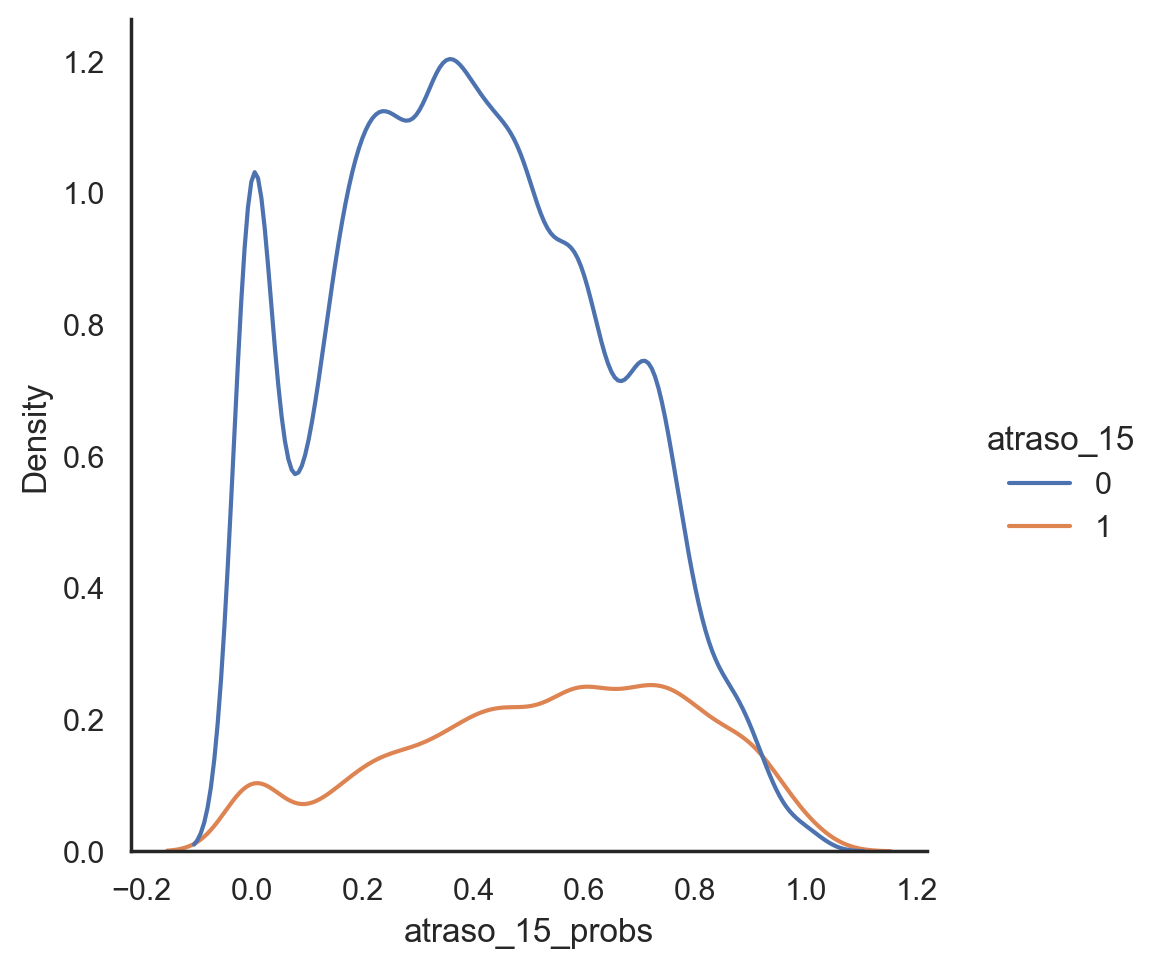

In [8]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [9]:
clf = LogisticRegression()
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.629218021225607
EL ROC AUC Score es: 0.683558861263981
              precision    recall  f1-score   support

           0       0.88      0.65      0.75     16678
           1       0.28      0.61      0.39      3784

    accuracy                           0.64     20462
   macro avg       0.58      0.63      0.57     20462
weighted avg       0.77      0.64      0.68     20462



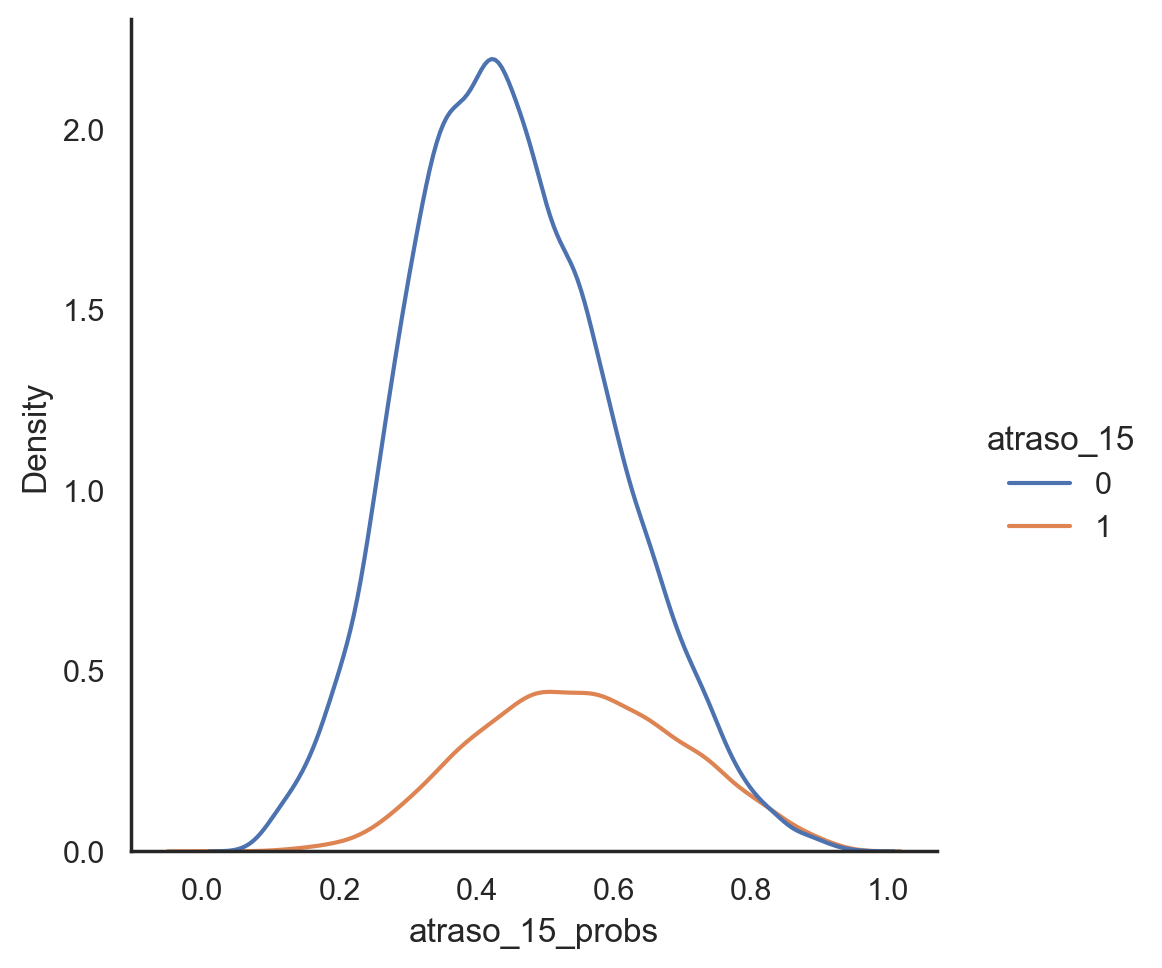

In [10]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [11]:
clf = RandomForestClassifier(n_estimators=500,random_state=0,warm_start=True,criterion='gini',
                             bootstrap=True,max_features='sqrt')
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.8910749620032522
EL ROC AUC Score es: 0.6695092844265478
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     16678
           1       0.32      0.35      0.34      3784

    accuracy                           0.74     20462
   macro avg       0.58      0.59      0.59     20462
weighted avg       0.75      0.74      0.75     20462



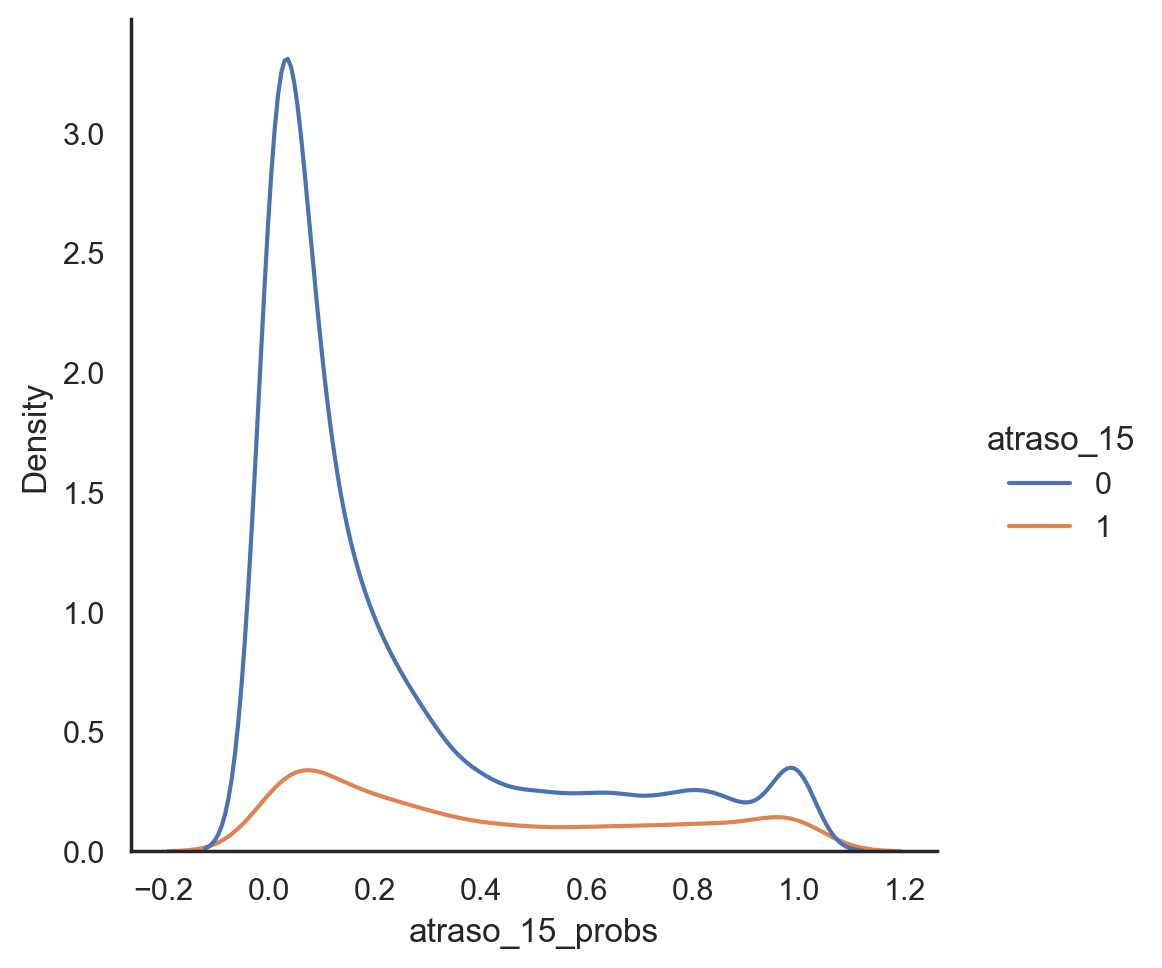

In [12]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [13]:
clf = XGBClassifier(random_state=0,verbosity = 0)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.7178002801981084
EL ROC AUC Score es: 0.726282211605622
              precision    recall  f1-score   support

           0       0.89      0.72      0.80     16678
           1       0.33      0.62      0.43      3784

    accuracy                           0.70     20462
   macro avg       0.61      0.67      0.61     20462
weighted avg       0.79      0.70      0.73     20462



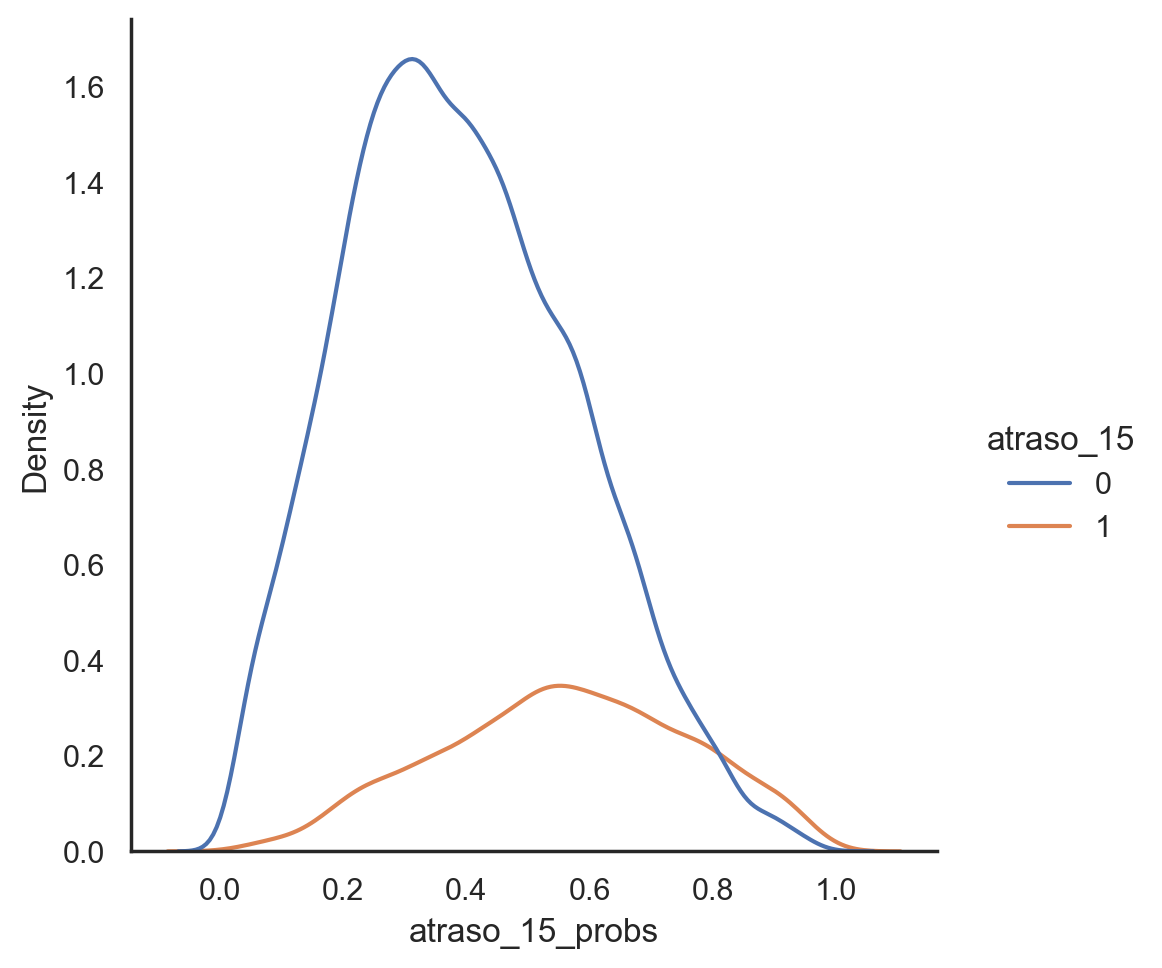

In [14]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)
y_pred_probs, y_pred = traine(clf, X_train, y_train,X_test,y_test)
test(y_test, y_pred_probs, y_pred)

El F1-weighted en entrenamiento con validación cruzada es es: 0.5813508987707754
EL ROC AUC Score es: 0.5112507612159883
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     16678
           1       0.20      0.11      0.14      3784

    accuracy                           0.75     20462
   macro avg       0.51      0.51      0.50     20462
weighted avg       0.70      0.75      0.72     20462



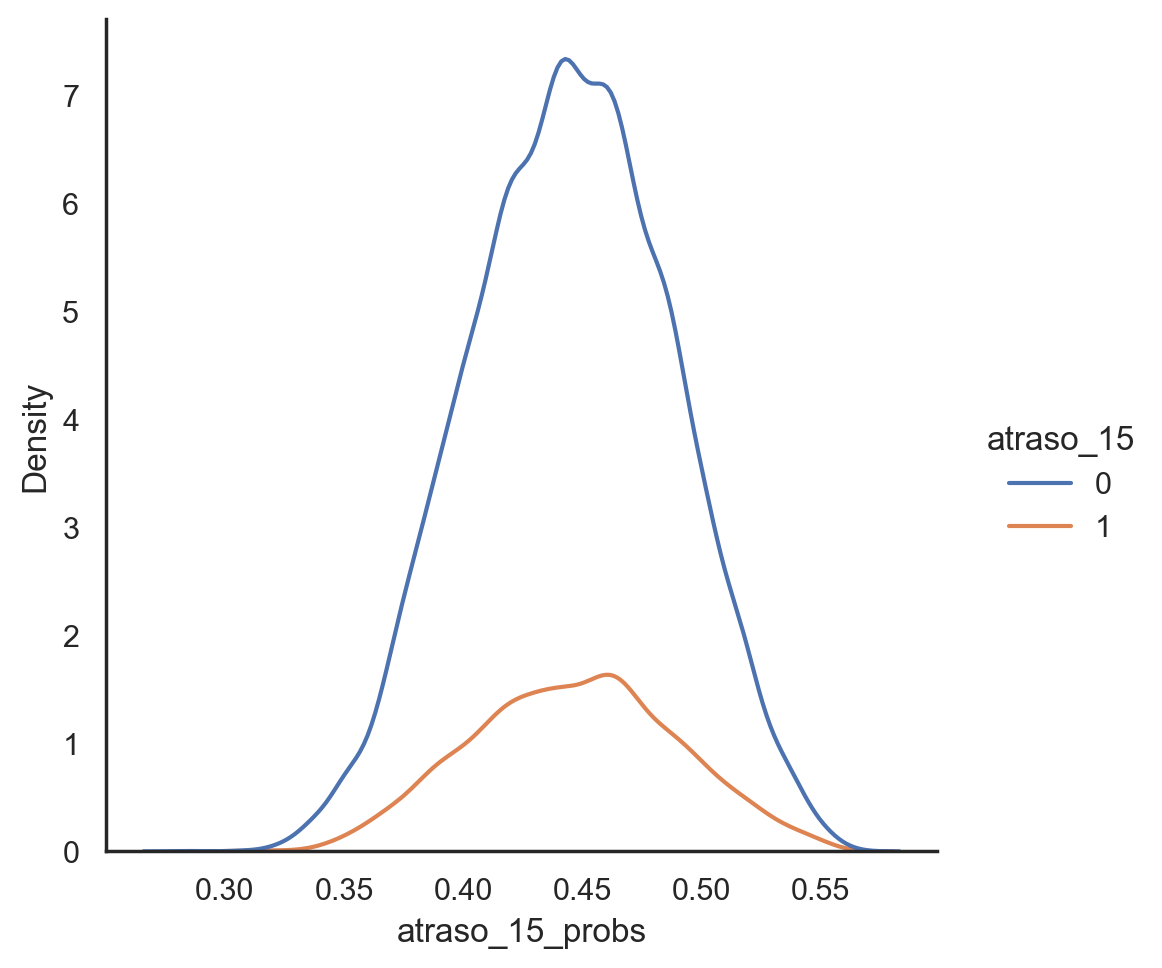

In [17]:
y_test['atraso_15_probs'] = y_pred_probs
sns.displot(data=y_test, x="atraso_15_probs", hue="atraso_15",kind="kde");